In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
ds = xr.open_dataset('/pool0/data/orianac/FROM_RAID3/bpa/future/waterhackweek_dalles_salmonfalls.nc')

ValueError: cannot read or write netCDF files without netCDF4-python or scipy installed

In [128]:
ds_sel = ds.sel(gcm='canesm2', rcp='rcp85', downscale_method='maca',
               parameters='calib_inverse', outlets=b'BRN')

In [195]:
ds_sel = ds.sel(gcm='hadgem2-es', rcp='rcp85', 
       downscale_method='maca', parameters='calib_inverse', outlets=b'BRN')
ts = ds_sel['streamflow']

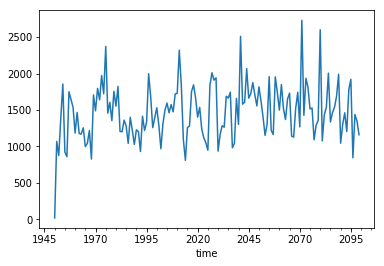

In [36]:
ds_sel['streamflow'].sel(time=slice('1950', '2099')).to_series().resample('A').min().plot()

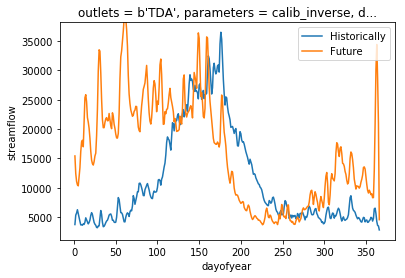

In [55]:
ds_sel['streamflow'].sel(time=slice('1970', '1999')).groupby('time.dayofyear').max().plot(label='Historically')
ds_sel['streamflow'].sel(time=slice('2070', '2099')).groupby('time.dayofyear').max().plot(label='Future')
plt.legend()

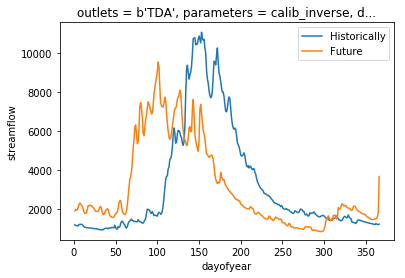

In [54]:
ds_sel['streamflow'].sel(time=slice('1970', '1999')).groupby('time.dayofyear').min().plot(label='Historically')
ds_sel['streamflow'].sel(time=slice('2070', '2099')).groupby('time.dayofyear').min().plot(label='Future')
plt.legend()

In [168]:
def get_quantile_flow(timeseries, quantile):
    '''
    Inputs:
    - timeseries is the daily xarray timeseries you want to base
    your quantile mapping on
    - quantile is a fraction from 0 to 1 (0.1 would be the lower 
    10th percentile)
    Outputs:
    the value of the timeseries corresponding to the quantile you specified
    '''
    return timeseries.quantile(q=quantile).values

In [228]:
def count_annual_days_below_threshold(timeseries, threshold):
    above = timeseries.where(timeseries > threshold)
    count = np.isnan(above).resample(time='A').sum()
    return count

In [229]:
def aug_sept(month):
    return (month>=8) & (month<=9)

In [230]:
tenth_percentile_flow

array(241.91992798)

In [232]:
ts_aug_sept = ds.sel(time=aug_sept(ds['time.month']))

In [238]:
ts_aug_sept.quantile(0.1)

<xarray.Dataset>
Dimensions:     ()
Coordinates:
    quantile    float64 0.1
Data variables:
    streamflow  float64 300.6

In [234]:
tenth_percentile_flow = get_quantile_flow(ts_aug_sept, 0.1)

In [241]:
xr.apply_ufunc(get_quantile_flow, ts_aug_sept, 0.1, 
               input_core_dims=[['time']], 
                         vectorize=True)

AttributeError: 'numpy.ndarray' object has no attribute 'quantile'

In [231]:
annual_count = count_annual_days_below_threshold(ts_aug_sept, tenth_percentile_flow)

In [225]:
annual_count.sel(time=slice('1970','1999'))

<xarray.DataArray 'streamflow' (time: 30)>
array([31,  4, 23,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 33, 48,
        3,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0])
Coordinates:
  * time              (time) datetime64[ns] 1970-12-31 1971-12-31 1972-12-31 ...
    outlets           |S3 b'BRN'
    parameters        <U13 'calib_inverse'
    downscale_method  <U4 'maca'
    gcm               <U10 'hadgem2-es'
    rcp               <U5 'rcp85'

In [226]:
annual_count.sel(time=slice('2070','2099')).sum()/30

<xarray.DataArray 'streamflow' ()>
array(7.766667)
Coordinates:
    outlets           |S3 b'BRN'
    parameters        <U13 'calib_inverse'
    downscale_method  <U4 'maca'
    gcm               <U10 'hadgem2-es'
    rcp               <U5 'rcp85'

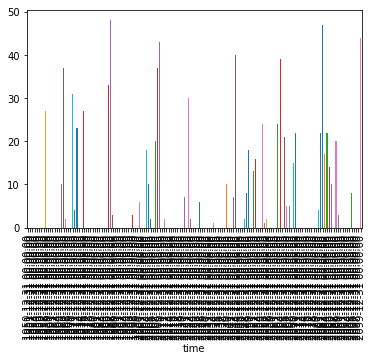

In [227]:
annual_count.to_series().plot.bar()

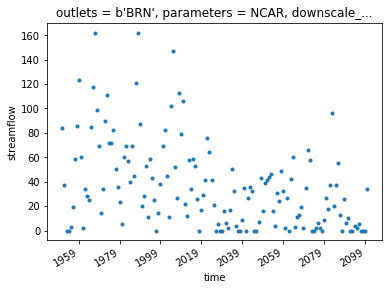

In [176]:
annual_count.plot(marker='.', lw=0)

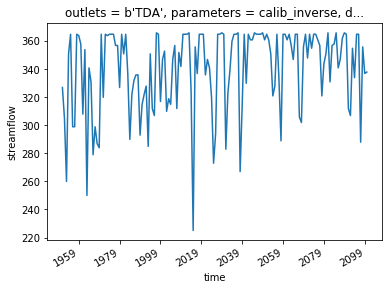

In [105]:
x

<xarray.DataArray 'streamflow' (time: 54787)>
array([ 20.142502, 277.949432, 893.680786, ...,        nan,        nan,
              nan])
Coordinates:
  * time              (time) datetime64[ns] 1950-01-01 1950-01-02 1950-01-03 ...
    outlets           |S256 b'TDA'
    parameters        <U13 'calib_inverse'
    downscale_method  <U4 'maca'
    gcm               <U7 'canesm2'
    rcp               <U5 'rcp85'

In [104]:
np.isnan(x)

<xarray.DataArray 'streamflow' (time: 54787)>
array([False, False, False, ...,  True,  True,  True])
Coordinates:
  * time              (time) datetime64[ns] 1950-01-01 1950-01-02 1950-01-03 ...
    outlets           |S256 b'TDA'
    parameters        <U13 'calib_inverse'
    downscale_method  <U4 'maca'
    gcm               <U7 'canesm2'
    rcp               <U5 'rcp85'